In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data=pd.read_csv("E:\Misc\Data Analytics Training\HR\HR_comma_sep.csv")
data.shape
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [2]:
data.isnull().values.any()


False

In [3]:
plt.style.use('ggplot')

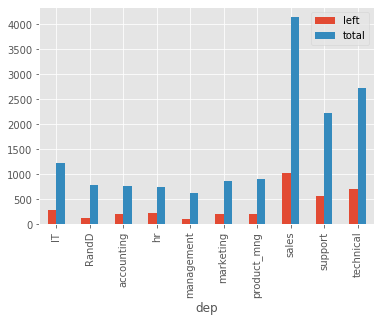

In [4]:
data1 = data[['left', 'sales']]
data1 = data1.groupby('sales').agg(['sum', 'count']).reset_index()
data1.columns = data1.columns.get_level_values(0)
data1.columns = ['dep', 'left', 'total']
data1.plot(x='dep',y=['left', 'total'],kind='bar')
plt.show()



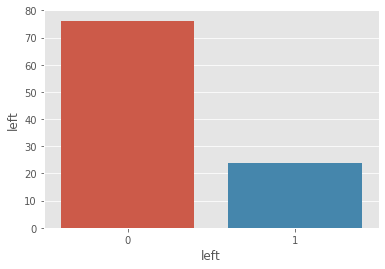

In [5]:
"""
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['C', 'C++', 'Java', 'Python', 'PHP']
students = [23,17,35,29,12]
ax.bar(langs,students)
plt.show()
"""

import seaborn as sns
p = sns.barplot( x = 'left',y='left',data=data,estimator=lambda x: len(x) / len(data) * 100)


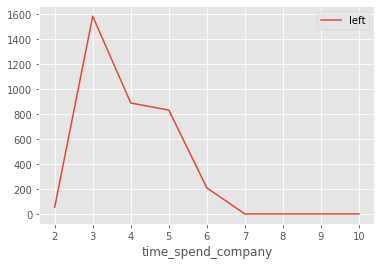

In [6]:
#Time spend at the company vs left! After 3 years at the company chances of leaving it decreases
data1 = data[['left', 'time_spend_company']]
data1 = data1.groupby('time_spend_company').agg(['sum', 'count']).reset_index()
data1.columns = data1.columns.get_level_values(0)
data1.columns = ['time_spend_company', 'left', 'total']
data1.plot(x='time_spend_company',y=['left'])
plt.show()


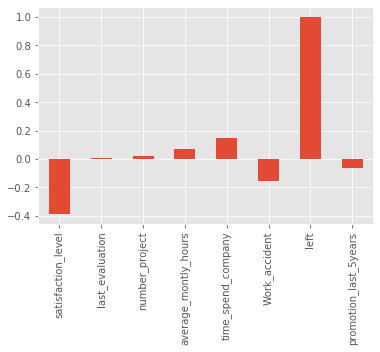

In [7]:
#compute correlation of left colum with other variables
corr = data.corr()
corr['left'].plot(kind='bar')
plt.show()

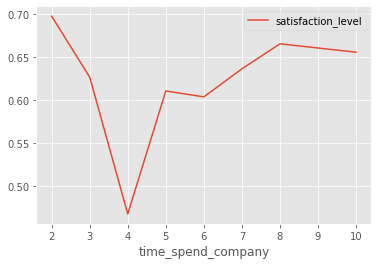

In [8]:
#Satisfication level vs time spent in the company!
data1 = data[['time_spend_company', 'satisfaction_level']]
data1 = data1.groupby('time_spend_company').agg(['mean']).reset_index()
data1.columns = data1.columns.get_level_values(0)
data1.plot(x='time_spend_company', y='satisfaction_level')
plt.show()

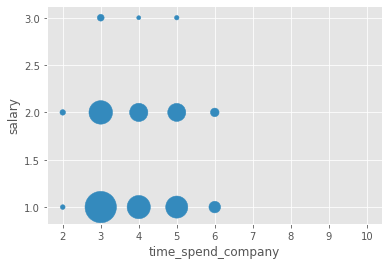

In [9]:
#Relation between number of employees leave the company in a relation with both their salaries
#and number of years in the company
data1 = data[['time_spend_company', 'salary','left']]
data1 = data1.groupby(['time_spend_company','salary']).agg(['sum']).reset_index()
data1.columns = data1.columns.get_level_values(0)
#convert salary column to numeric values high=>3, medium=>2, low=>1
data1.loc[:,'salary'] = data1.apply(lambda row : {'high':3, 'medium':2, 'low':1}[row['salary']], 1)
data1.plot(x='time_spend_company', y='salary', s=data1['left'], kind='scatter')
plt.show()

In [10]:
from collections import defaultdict
train_set = defaultdict(list)

In [11]:
data['salary']=data.salary.astype(object)
data.salary = data.salary.replace({'high':3, 'medium':2, 'low':1})

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

train = data.sample(frac=0.8, random_state=1)
test  = data.loc[~data.index.isin(train.index)]

#prediction based on: last_evaluation, number_project, average_montly_hours,time_spend_company, salary

train_x = train[['last_evaluation','number_project','average_montly_hours','time_spend_company','salary']]
test_x = test[['last_evaluation','number_project','average_montly_hours','time_spend_company','salary']]

model = LogisticRegression(random_state=0).fit(train_x,train.left)
y_predict = model.predict(test_x)

print('Accuracy:', metrics.accuracy_score(test.left, y_predict))


Accuracy: 0.7503333333333333


In [12]:
ypredictprob=model.predict_proba(test_x)[:,1]

fpr,tpr,_= metrics.roc_curve(test.left,ypredictprob)
metrics.auc(fpr,tpr)

0.6691505557911128

In [13]:
ypredictprob

array([0.28893266, 0.19862885, 0.27726801, ..., 0.21541059, 0.3416171 ,
       0.27853957])

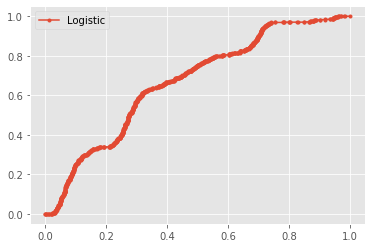

In [14]:
plt.plot(fpr,tpr,marker='.',label='Logistic')
plt.legend()

In [15]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test.left,ypredictprob)
print('AUC: %.3f' % auc)

AUC: 0.669


In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test.left, y_predict)

array([[2250,   48],
       [ 701,    1]], dtype=int64)

In [17]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test.left,y_predict)
print('MSE: %.3f' % mse)

MSE: 0.250
